In [2]:
# import matplotlib.pyplot as plt
# from ultralytics import YOLO
# import cv2
# import google.generativeai as genai
# from PIL import Image, ImageDraw, ImageFont
# import numpy as np
# import time
# import os
from projectaria_tools.core import data_provider, calibration
import projectaria_tools.core.mps as mps
from projectaria_tools.core import data_provider
from projectaria_tools.core.stream_id import StreamId
from projectaria_tools.core.mps.utils import (
    get_gaze_vector_reprojection,
    get_nearest_eye_gaze
)
# import glob
from projectaria_tools.core.mps.utils import get_nearest_wrist_and_palm_pose
# import pandas as pd
import numpy as np
import cv2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

data = np.load('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/driving_data/cartest2/cartest2.npy', allow_pickle=True).item()
frames = data['rgb']
frames = list(frames.values())

imu = data['imu']

print(len(frames))

for i,frame in enumerate(frames):
    cv2.imwrite(f'/Volumes/MichaelSSD/obj_det_test/{i}.png', cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

1000


In [4]:
from ultralytics import YOLO

# Load the model
model = YOLO("/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/runs/detect/train3/weights/best.pt")

# Run inference on an image
results = model.predict("/Volumes/MichaelSSD/obj_det_test/998.png", device="mps")

# Show the result
for result in results:
    result.show()

# sample = frames[999]

# print(np.shape(frame))
# plt.figure(figsize=(15,15))  # Set figure size (width=8 inches, height=6 inches)
# plt.imshow(sample)
# plt.axis("off")  # Hide axes
# plt.show()


image 1/1 /Volumes/MichaelSSD/obj_det_test/998.png: 640x640 1 Infotainment Unit, 1 Rearview Mirror, 1 Right Wing Mirror, 1 Steering Wheel, 9.9ms
Speed: 81.9ms preprocess, 9.9ms inference, 839.3ms postprocess per image at shape (1, 3, 640, 640)


In [3]:
gaze_cpf = mps.read_eyegaze('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/sample3/mps_Driving_Profile_Test_vrs/eye_gaze/general_eye_gaze.csv')
handwrist_points  = mps.hand_tracking.read_wrist_and_palm_poses('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/sample3/mps_Driving_Profile_Test_vrs/hand_tracking/wrist_and_palm_poses.csv')


timestamps = np.linspace(119.521, 136.771, 346)

res = {}

for t in timestamps:
  tns = t * 1e9

  wrist_and_palm_pose = get_nearest_wrist_and_palm_pose(handwrist_points, tns)

  if wrist_and_palm_pose is not None:
    left_pose_confidence = wrist_and_palm_pose.left_hand.confidence
    left_wrist_position_device = wrist_and_palm_pose.left_hand.wrist_position_device
    left_palm_position_device = wrist_and_palm_pose.left_hand.palm_position_device
    left_wrist_normal_device = wrist_and_palm_pose.left_hand.wrist_and_palm_normal_device.wrist_normal_device

    res[t] = {
      'left_pose_confidence': left_pose_confidence,
      'left_wrist_position_device': left_wrist_position_device,
      'left_palm_position_device': left_palm_position_device,
      'left_wrist_normal_device': left_wrist_normal_device
    }





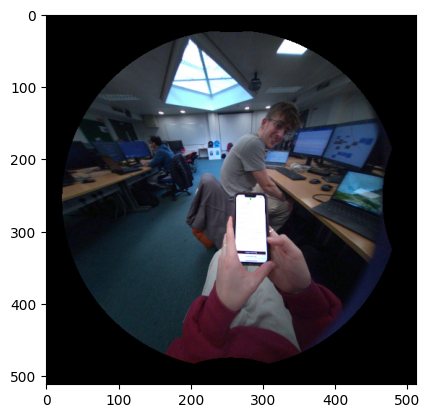

In [17]:
from projectaria_tools.core.calibration import (
    device_calibration_from_json_string,
    distort_by_calibration,
    get_linear_camera_calibration,
)
import matplotlib.pyplot as plt
import numpy as np
import cv2
from projectaria_tools.core.image import InterpolationMethod

# Load image and calibration

path = 'C:/Users/athen/Desktop/Github/MastersThesis/sampledata/imagetesting/facetest.jpg'
samp = cv2.imread(path)

#float32


with open('C:/Users/athen/Desktop/Github/MastersThesis/MSc_AI_Thesis/Coding/other/calibration.json') as f:
    sc = f.read()


sensors_calib = device_calibration_from_json_string(sc)
rgb_calib = sensors_calib.get_camera_calib("camera-rgb")
dst_calib = get_linear_camera_calibration(512, 512, 150, "camera-rgb")

# for img in rgb_images:

undistorted_rgb_image = distort_by_calibration(
                samp, dst_calib, rgb_calib,
                InterpolationMethod.BILINEAR
            )

plt.imshow(cv2.cvtColor(undistorted_rgb_image, cv2.COLOR_BGR2RGB))
plt.show()
        


In [15]:
import os 

files = os.listdir('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/sample3/frames')

files_et = [f for f in files if '211' in f]

for f in files_et:
    image = cv2.imread('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/sample3/frames/' + f)
    #save images
    cv2.imwrite('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/sample3/etframes/' + f, image)


In [2]:
import cv2
import numpy as np 

video_path = "C:/Users/athen/Downloads/kinect_color/kinect_color/vp3/run2_2018-05-29-16-03-37.kinect_color.mp4"

cap = cv2.VideoCapture(video_path)
fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))
codec = "".join([chr((fourcc >> 8 * i) & 0xFF) for i in range(4)])

print(f"Codec: {codec}")

while cap.isOpened():
    ret, frame = cap.read()
    print(frame.size)

    break

Codec: h264
1555200


In [15]:
data = np.load('C:/Users/athen/Desktop/Github/MastersThesis/sampledata/testfolder/f1/f1.npy', allow_pickle=True).item()['rgb']



In [16]:
frame = np.array(list(data.values())[0])

print(type(frame))
print(frame.size)

<class 'numpy.ndarray'>
786432


In [4]:
import cv2
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis')
from notebooks_and_scripts.vrs_extractor import VRSDataExtractor

sample_img = cv2.imread('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/imagetesting/fullres_lp_success.jpeg')
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

vde = VRSDataExtractor('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/driving_data/cartest2/cartest2.vrs')







[ProgressLogger][INFO]: 2025-04-07 17:29:08: Opening /Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/driving_data/cartest2/cartest2.vrs...
[VRSIndexRecord][WARNING]: 58 record(s) not sorted properly. Sorting index.
[MultiRecordFileReader][DEBUG]: Opened file '/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/driving_data/cartest2/cartest2.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 211-1/camera-et activated
[VrsDataProvider][INFO]: streamId 214-1/camera-rgb activated
[VrsDataProvider][INFO]: streamId 231-1/mic activated
[VrsDataProvider][INFO]: streamId 281-1/gps activated
[VrsDataProvider][INFO]: streamId 282-1/wps activated
[VrsDataProvider][INFO]: streamId 283-1/bluetooth activated
[VrsDataProvider][WARNING]: Unsupported TimeSync mode: APP, ignoring.
[VrsDataProvider][INFO]: Fail to activate streamId 286-1
[VrsDataProvider][INFO]: streamId 1201-1/camera-slam-left activated
[VrsDataProvider][INFO]: streamId 1201-2/camera-slam

In [1]:
import numpy as np 

data = np.load('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/driving_data/cartest2/cartest2.npy', allow_pickle=True).item()

frames = data['rgb']
frames = list(frames.values())




(1408, 1408, 3)


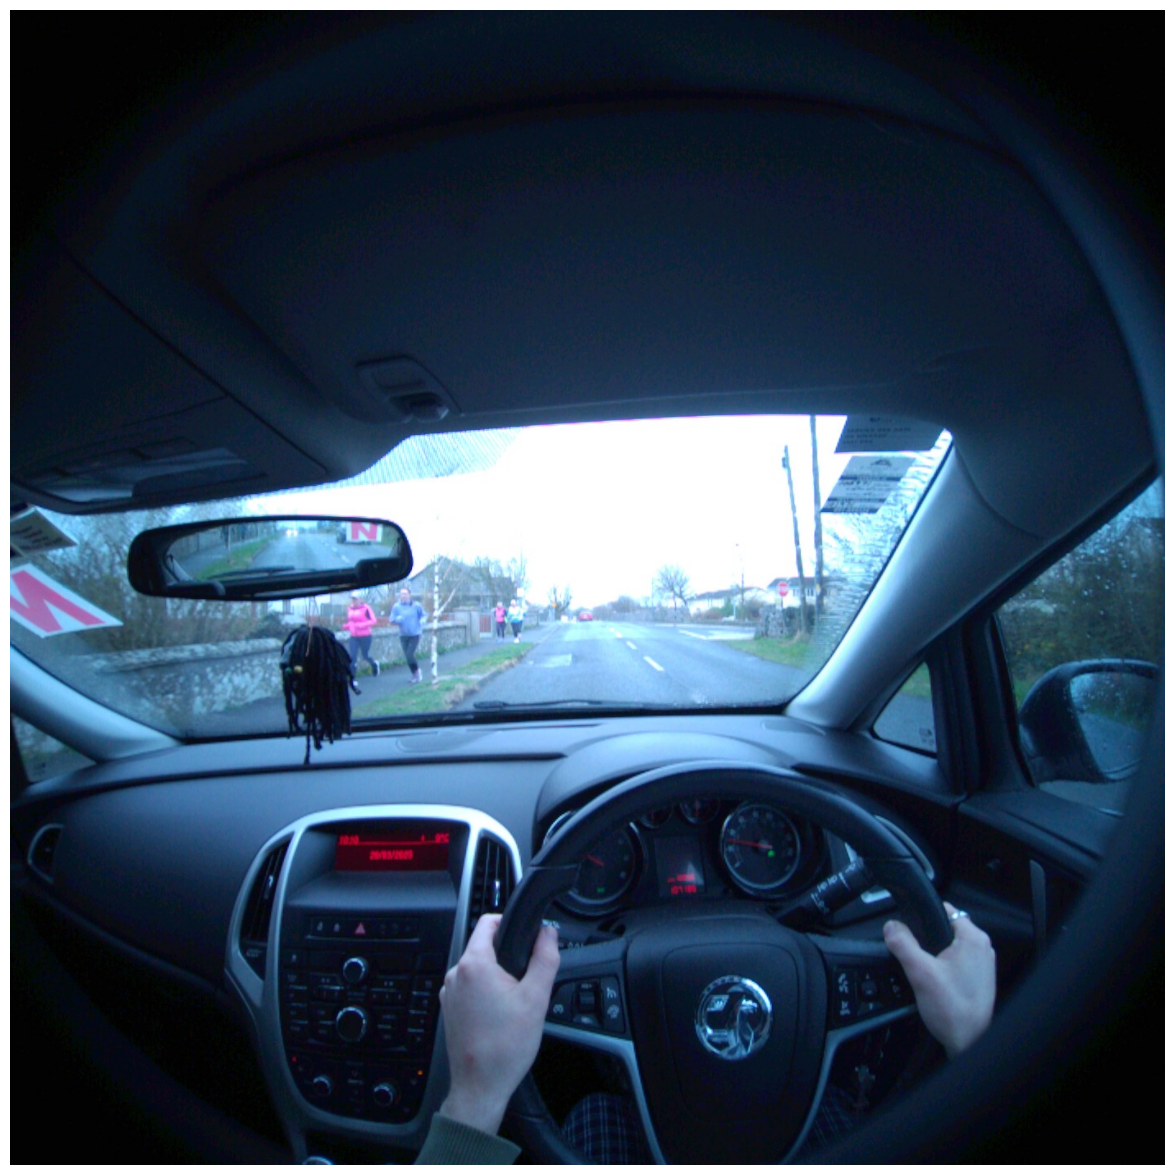

In [7]:
import matplotlib.pyplot as plt
sample = frames[233]

print(np.shape(sample))

plt.figure(figsize=(15,15))  # Set figure size (width=8 inches, height=6 inches)
plt.imshow(sample)
plt.axis("off")  # Hide axes
plt.show()

In [8]:
cropped_images = vde.person_detection(sample)
print(len(cropped_images))


0: 640x640 3 persons, 1 car, 1 horse, 1 cell phone, 46.3ms
Speed: 1.7ms preprocess, 46.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
3


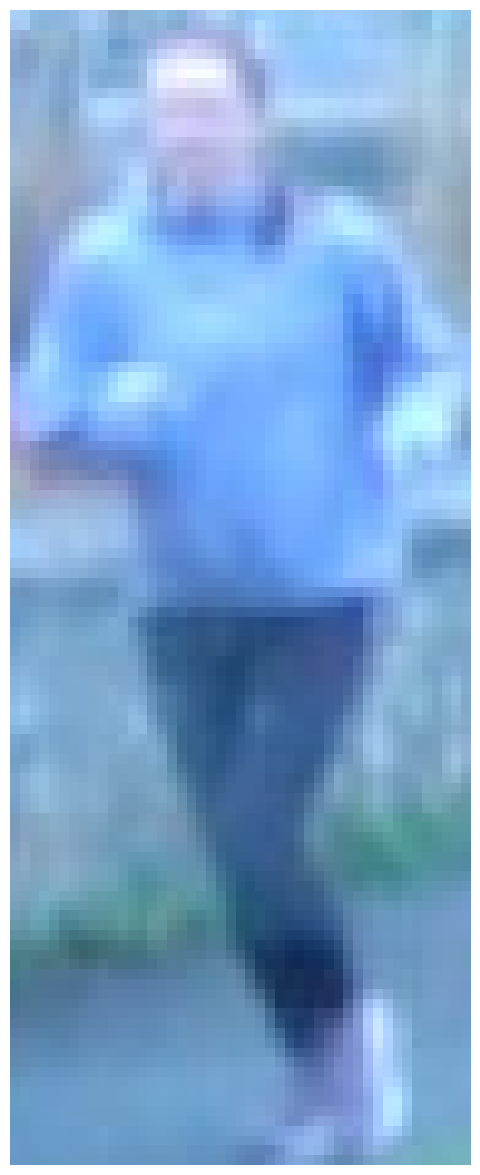

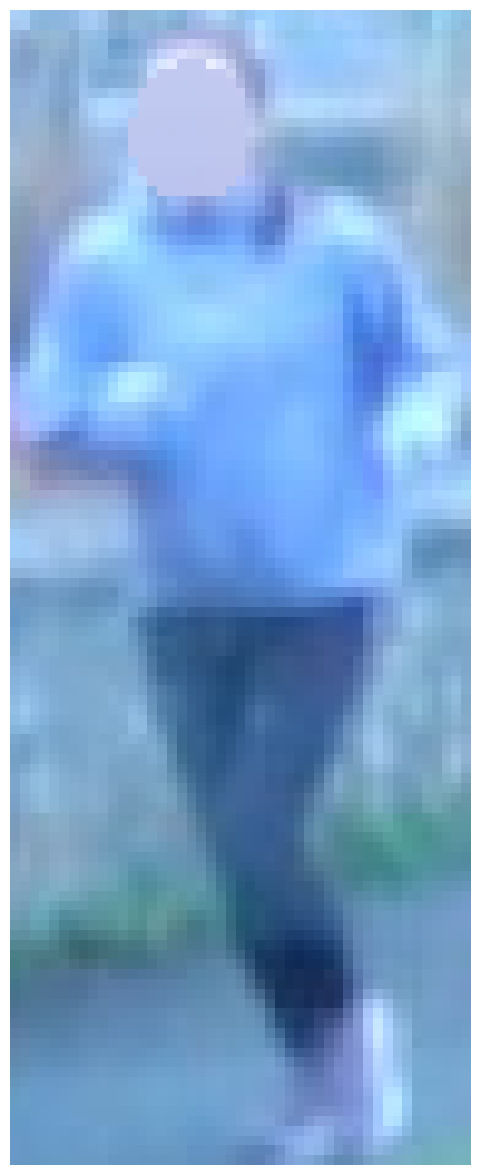

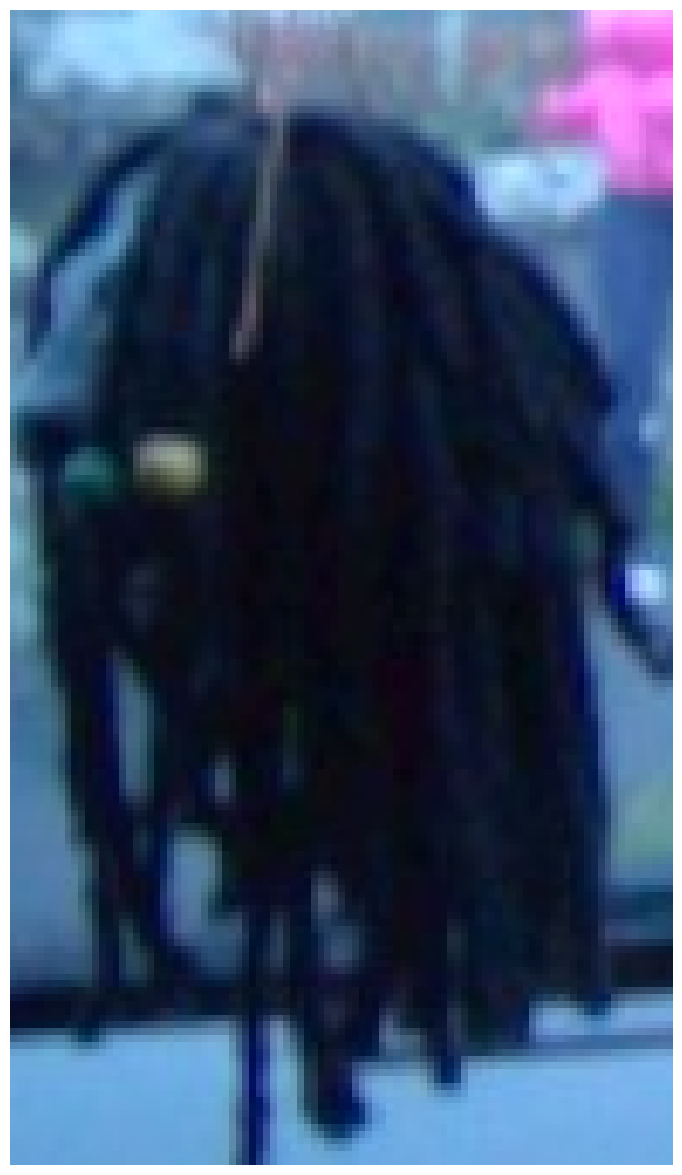

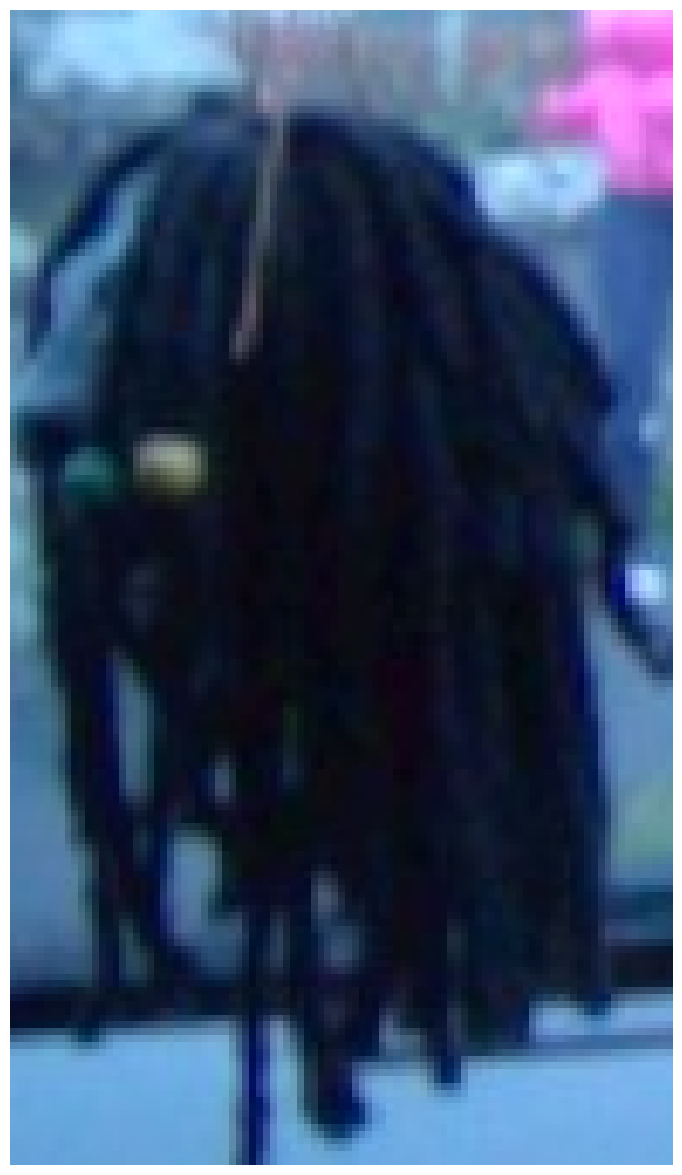

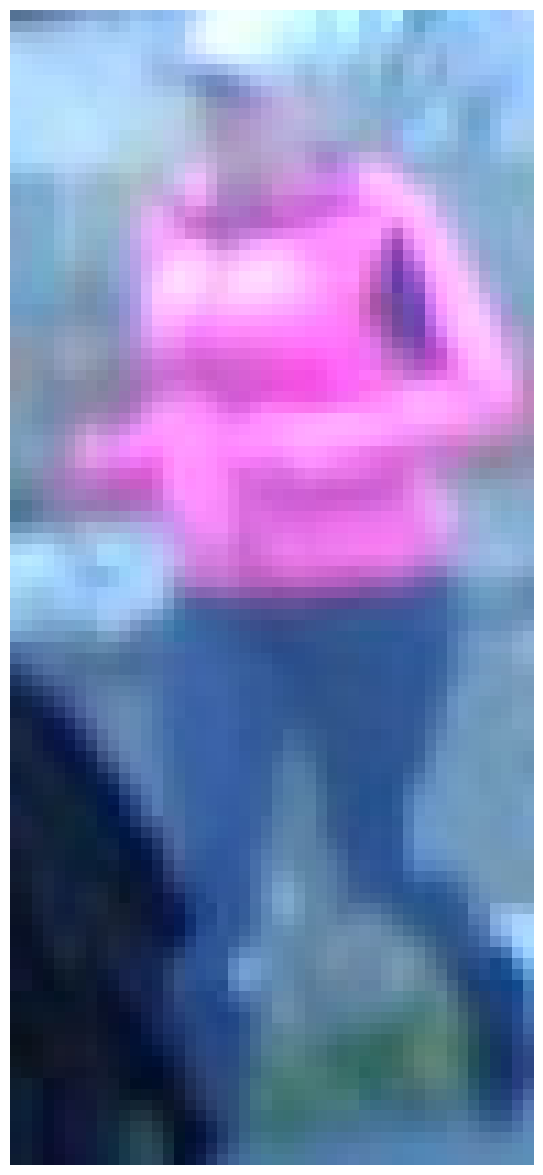

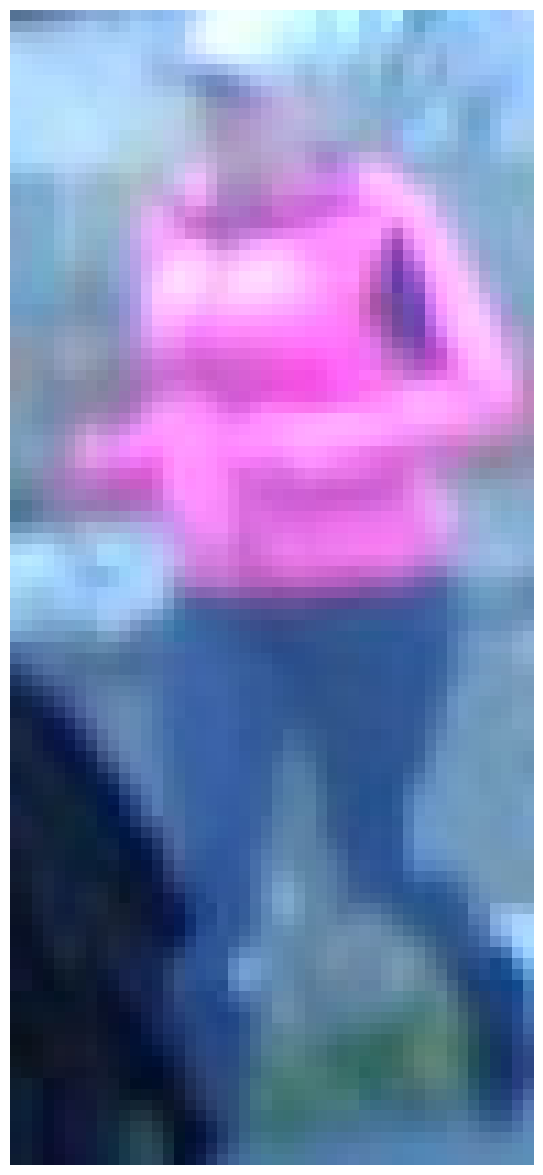

In [13]:
from OtherModelScripts import ego_blur 
import torch 

egoblur_face_path = '/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/models/ego_blur_face.jit'
face_detector = torch.jit.load(egoblur_face_path, map_location="cpu")
license_plate_path = '/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/models/ego_blur_lp.jit'
lp_detector = torch.jit.load(license_plate_path, map_location="cpu")

for img in cropped_images:

    plt.figure(figsize=(15,15))  # Set figure size (width=8 inches, height=6 inches)
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.show()

    
    bgr_frame = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    image = bgr_frame.copy()

    image_tensor = ego_blur.get_image_tensor(image)
    image_tensor_copy = image_tensor.clone()

    face_model_score_threshold = 0.1
    lp_model_score_threshold = 0.9
    nms_iou_threshold = 0.4
    scale_factor_detections = 1

    label = 'face'

    output_image = ego_blur.visualize_image(
        image,
        image_tensor,
        image_tensor_copy,
        face_detector,
        lp_detector,
        face_model_score_threshold,
        lp_model_score_threshold,
        nms_iou_threshold,
        scale_factor_detections,
        label
    )

    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,15))  # Set figure size (width=8 inches, height=6 inches)
    plt.imshow(output_image)
    plt.axis("off")  # Hide axes
    plt.show()


devignette testing

In [3]:
from projectaria_tools.core import data_provider

provider = data_provider.create_vrs_data_provider('/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/yolo/DadCarYOLO.vrs')
camera_label = 'camera-rgb'
stream_id = provider.get_stream_id_from_label(camera_label)

provider.set_color_correction(True)


[ProgressLogger][INFO]: 2025-05-03 16:21:05: Opening /Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/yolo/DadCarYOLO.vrs...
[MultiRecordFileReader][DEBUG]: Opened file '/Users/michaelrice/Documents/GitHub/Thesis/MSc_AI_Thesis/sampledata/yolo/DadCarYOLO.vrs' and assigned to reader #0
[VrsDataProvider][INFO]: streamId 214-1/camera-rgb activated
[VrsDataProvider][WARNING]: Unsupported TimeSync mode: APP, ignoring.
[VrsDataProvider][INFO]: Fail to activate streamId 286-1


AttributeError: '_core_pybinds.data_provider.VrsDataProvider' object has no attribute 'set_color_correction'